In [88]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import scale
#from sklearn.metrics import silhouette_score

from sklearn import metrics
#from sklearn.metrics import pairwise_distances_argmin_min 

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def plot_dendrogram(model, **kwargs):
    '''
    Esta función extrae la información de un modelo AgglomerativeClustering
    y representa su dendograma con la función dendogram de scipy.cluster.hierarchy
    '''
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot
    dendrogram(linkage_matrix, **kwargs)

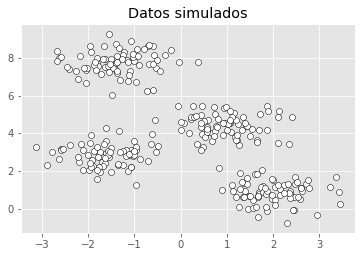

In [4]:
from sklearn.datasets import make_blobs
# Simulación de datos
# ==============================================================================
X, y = make_blobs(
        n_samples    = 300, 
        n_features   = 2, 
        centers      = 4, 
        cluster_std  = 0.60, 
        shuffle      = True, 
        random_state = 0
       )

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.scatter(
    x = X[:, 0],
    y = X[:, 1], 
    c = 'white',
    marker    = 'o',
    edgecolor = 'black', 
)
ax.set_title('Datos simulados');

In [21]:
# Data y Escalamiento
# ==============================================================================
X_scaled = scale(X)

In [124]:
# Configuración Kmeans
numCluster = range(3, 10)
l_mod_KMeans = ['Kmeans_NCluster'+str(i) for i in numCluster]
iter_KMeans = [KMeans(n_init=5, n_clusters=i, random_state=123) for i in numCluster]

In [125]:
# Configuración DBSCAN
numSam = range(4, 16)
l_mod_DBSCAN = ['DBSCAN_nSample'+str(i) for i in numSam]
iter_DBSCAN = [DBSCAN(eps=0.25, min_samples=i, n_jobs = -1) for i in numSam]

In [126]:
# Configuracion Jerarquico
l_linkage = ['complete', 'average', 'ward']
numCluster = range(3, 10)
#l_mod_HClust = ['HClust_'+str(i)+'_'+str(j) for i in l_linkage]
l_mod_HClust = []
for i in l_linkage:
    for j in numCluster:
        l_mod_HClust = l_mod_HClust + ['HClust_'+str(i)+'_NCluster'+str(j)]
#iter_HClust = [AgglomerativeClustering(affinity = 'euclidean',linkage  = i,distance_threshold = 0,n_clusters = None) for i in l_linkage]
iter_HClust = []
for i in l_linkage:
    for j in numCluster:
        iter_HClust = iter_HClust + [AgglomerativeClustering(affinity = 'euclidean',linkage  = i,n_clusters = j)]

In [127]:
# Configuración GMMs
numCluster = range(3, 10)
l_mod_GMM = ['GMM_NCluster'+str(i) for i in numCluster]
iter_GMM = [GaussianMixture(covariance_type='full', n_components=i, random_state=123) for i in numCluster]

In [128]:
iter_model = iter_KMeans + iter_DBSCAN + iter_HClust
list_mod = l_mod_KMeans + l_mod_DBSCAN + l_mod_HClust
print('Cantidad de modelos:',len(iter_model))
print(list_mod)

Cantidad de modelos: 40
['Kmeans_NCluster3', 'Kmeans_NCluster4', 'Kmeans_NCluster5', 'Kmeans_NCluster6', 'Kmeans_NCluster7', 'Kmeans_NCluster8', 'Kmeans_NCluster9', 'DBSCAN_nSample4', 'DBSCAN_nSample5', 'DBSCAN_nSample6', 'DBSCAN_nSample7', 'DBSCAN_nSample8', 'DBSCAN_nSample9', 'DBSCAN_nSample10', 'DBSCAN_nSample11', 'DBSCAN_nSample12', 'DBSCAN_nSample13', 'DBSCAN_nSample14', 'DBSCAN_nSample15', 'HClust_complete_NCluster3', 'HClust_complete_NCluster4', 'HClust_complete_NCluster5', 'HClust_complete_NCluster6', 'HClust_complete_NCluster7', 'HClust_complete_NCluster8', 'HClust_complete_NCluster9', 'HClust_average_NCluster3', 'HClust_average_NCluster4', 'HClust_average_NCluster5', 'HClust_average_NCluster6', 'HClust_average_NCluster7', 'HClust_average_NCluster8', 'HClust_average_NCluster9', 'HClust_ward_NCluster3', 'HClust_ward_NCluster4', 'HClust_ward_NCluster5', 'HClust_ward_NCluster6', 'HClust_ward_NCluster7', 'HClust_ward_NCluster8', 'HClust_ward_NCluster9']


In [129]:
modCluster = [iter_model[i].fit(X) for i in range(len(iter_model))]
cluster = [modCluster[i].labels_ for i in range(len(modCluster))] 

In [130]:
modCluster2 = [iter_GMM[i].fit(X=X) for i in range(len(iter_GMM))]
cluster2 = [modCluster2[i].predict(X) for i in range(len(iter_GMM))]

In [134]:
cluster_f = cluster + cluster2
num_Cluster = [len(set(cluster_f[i])) for i in range(len(modCluster+modCluster2))]

In [146]:
valores_bic = [-1 for i in range(len(iter_model))]
valores_aic = [-1 for i in range(len(iter_model))]

for i in range(0,len(modCluster2)):
    valores_bic.append(modCluster2[i].bic(X))
    valores_aic.append(modCluster2[i].aic(X))

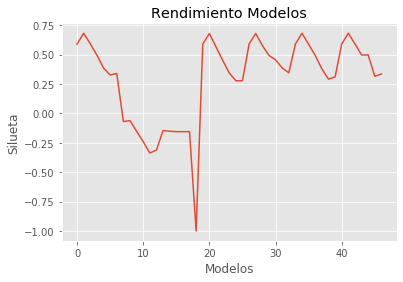

In [137]:
silhou  = [metrics.silhouette_score(X, cluster_f[i]) if num_Cluster[i]>1 else -1 for i in range(len(modCluster+modCluster2))] 
calinski = [metrics.calinski_harabasz_score(X, cluster_f[i]) if num_Cluster[i]>1 else -1 for i in range(len(modCluster+modCluster2))] 
davies_bouldin = [metrics.davies_bouldin_score(X, cluster_f[i]) if num_Cluster[i]>1 else -1 for i in range(len(modCluster+modCluster2))] 

plt.plot(silhou)
plt.xlabel('Modelos')
plt.ylabel('Silueta')
plt.title('Rendimiento Modelos')
plt.show()

In [148]:
tabla = {'Modelo':list_mod+l_mod_GMM,
         'numCluster' : num_Cluster,
         'silhouette_score':silhou, 
         'calinski': calinski, 
         'davies_bouldin':davies_bouldin,
         'BIC':valores_bic,
         'AIC':valores_aic}

df_reporte = pd.DataFrame(tabla)
df_reporte

,Modelo,numCluster,silhouette_score,calinski,davies_bouldin,bic,aic
0,Kmeans_NCluster3,3,0.589039,615.093327,0.626272,-1.000000,-1.000000
1,Kmeans_NCluster4,4,0.681994,1210.089914,0.437564,-1.000000,-1.000000
2,Kmeans_NCluster5,5,0.592303,1024.567544,0.695859,-1.000000,-1.000000
3,Kmeans_NCluster6,6,0.495634,908.472471,0.886531,-1.000000,-1.000000
4,Kmeans_NCluster7,7,0.386216,833.722884,1.075451,-1.000000,-1.000000
5,Kmeans_NCluster8,8,0.326461,810.689850,1.147535,-1.000000,-1.000000
6,Kmeans_NCluster9,9,0.340094,781.664022,1.059702,-1.000000,-1.000000
7,DBSCAN_nSample4,14,-0.069203,37.958443,2.028405,-1.000000,-1.000000
8,DBSCAN_nSample5,8,-0.062177,40.211050,2.480442,-1.000000,-1.000000
9,DBSCAN_nSample6,8,-0.152170,33.823919,2.318212,-1.000000,-1.000000
